In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

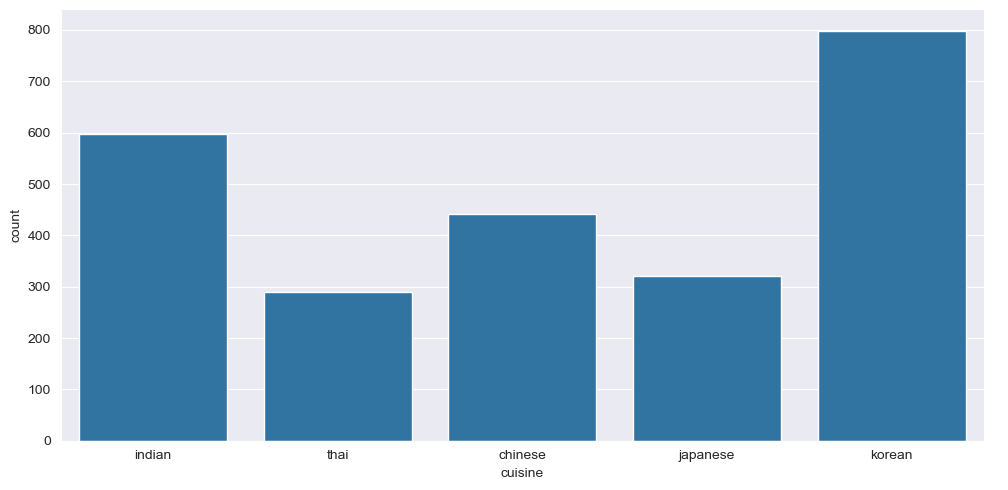

In [19]:
df  = pd.read_csv('../data/cuisines.csv')
sns.catplot(data=df, kind='count', x='cuisine', aspect=2)

In [20]:
thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

In [21]:
def create_ingredient_df(df):
    df = df.T
    df = df[(df != 0).any(axis=1)]
    count = df.drop(['cuisine','Unnamed: 0'], axis=0).sum(axis=1).to_frame('count')
    df = pd.concat([count, df], axis=1)
    df.sort_values(by='count', ascending=False, inplace=True)
    df.drop(['cuisine','Unnamed: 0'], axis=0, inplace=True)
    return df

<AxesSubplot:>

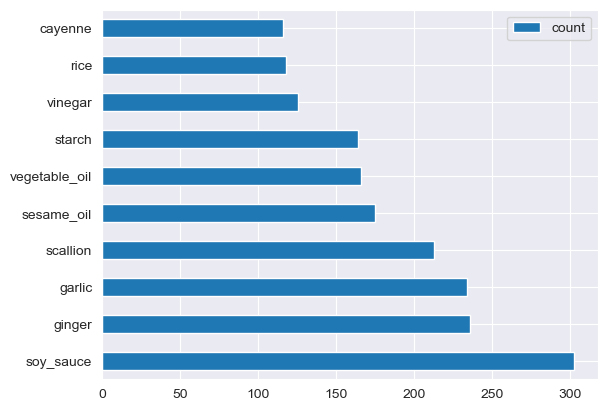

In [22]:
thai_ingredient_df = create_ingredient_df(chinese_df)
thai_ingredient_df.head(10).plot(y='count', kind='barh')

In [23]:
# df.cuisine.value_counts().plot.barh()
feature_df = df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
label_df = df.cuisine
# label_df.head(10)

In [24]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
feature_df, label_df = oversample.fit_resample(feature_df, label_df)
new_df = pd.concat([label_df, feature_df], axis=1)
new_df.head()
new_df.to_csv("../data/new_cuisines.csv")

D:\work\language\miniconda\envs\pytorch_39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
